# Digital Marketing Agency - BBVA's Data | Exploration & Cleanup + Analysis

----

### Description

* As known, one of the institutions with more information available (individually speaking), besides Google or Amazon, are financial institutions, specifically BANKS.
* Nowadays, BBVA knows it has valuable information for its clients (e.g. investors interested to analyze the potential demand in a specific zone regarding a specific business, the analyses of consumer patterns, among others).

---

#### Steps
* First, I had to get registered in order to get my secret ID for the use of BBVA's API, which I had to take into account for the handshake process to be able to get my token to be able to grant a 30 second access to its platform.
* Once I got my token I downloaded its available data.
* BBVA has a global and open API platform named API_Market. Its API counts with a growing catalog of products divided into: Retail accounts, business, and Data. There are two different access levels: Sandbox and Full formats. For the purpose of this analysis, I will use BBVA’s Sandbox data, which is available for unlimited time and it is free. You just have to fill out a short form and that gives you access to an individual ID.
* PayStats, a product of the Data division, allows you to dive into BBVA cards purchase data. PayStats offers anonymized and aggregated statistical data from millions of transactions performed with BBVA cards and any other cards in BBVA POS terminals, creating a virtual map comprised of consumers' habits, demographics and origins. The data is used to describe economic flows and commercial dynamics in a given zone.


In [5]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Datasets
----

### Consumption Pattern
----
#### Description
* This file provides typical consumption patterns by the hour of the day and the day of the week for a particular area. For each one of the time units, consumption statistics by the hour of the day and the day of the week are provided in the response and it is only available for month grouping.
* The following combination between cards and channel params are available for this service:

| Cards         | Channel    
| ------------- |:-------------:
| All           | POS 
| BBVA          | POS    
| Foreign       | BBVA_POS     
| National      | BBVA_POS

#### Output Layout
1. Zone: territorial unit id (in the territorial unit tile will be composed of two fields: latitude and longitude).
2. Date: the date the data refers to (YYYY-MM format for month and YYYY-MM-DD for day).
3. Card: Card type.
4. Channel: Channel type.
5. Category: type of category or subcategory.
6. Merchants: number of merchants with registered activity.
7. Cards: number of different cards.
8. Txs: number of physical purchase transactions.
9. Avg. amount: average transaction amount.
10. Day: day of the week. Values: [sunday, monday, tuesday, wednesday, thursday, friday, saturday].
11. Merchants by day: number of merchants with registered activity of the day of the week.
12. Cards by day: number of different cards of the day of the week.
13. Txs by day: number of physical purchase transactions of the day of the week.
14. Avg. amount by day: average amount of the day of the week.
15. Max. amount by day: maximum transaction amount of the day of the week.
16. Min. amount by day: minimum transaction amount of the day of the week.
17. Std. amount by day: transaction standard deviation amount of the day of the week.
18. Hour: hour of the day of the week. Values: [00, 01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23].
19. Merchants by hour: number of merchants with registered activity of the hour of the day of the week.
20. Cards by hour: number of different cards of the hour of the day of the week.
21. Txs by hour: number of physical purchase transactions of the hour of the day of the week.
22. Avg. amount by hour: average amount of the hour of the day of the week.
23. Max. amount by hour: maximum transaction amount of the hour of the day of the week.
24. Min. amount by hour: minimum transaction amount of the hour of the day of the week.
25. Std. amount hour: transaction standard deviation amount of the hour of the day of the week.

In [6]:
# Load in file
consumption_pattern_201510 = "Monthly_data/2015_10/tiles/consumption_pattern.csv"

#### DataFrame
----

In [7]:
# Read and display the CSV with Pandas
consumption_pattern_201510_pd = pd.read_csv(consumption_pattern_201510, sep=';')
consumption_pattern_201510_pd['Latitude'] = [x.replace(',','.') for x in consumption_pattern_201510_pd["Latitude"]]
consumption_pattern_201510_pd['Avg. amount'] = [ str(x).replace(',','.') for x in consumption_pattern_201510_pd["Avg. amount"]]

In [8]:
consumption_pattern_201510_pd.head(25)

,Latitude,Longitude,Date,Source,Channel,Category,Merchants,Cards,Txs,Avg. amount,...,Min. amount by day,Std. amount by day,Hour,Merchants by hour,Cards by hour,Txs by hour,Avg. amount by hour,Max. amount by hour,Min. amount by hour,Std. amount hour
0,40.325,"-3,71",2015-10,bbva,pos,all,NaN,NaN,NaN,nan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40.325,"-3,71",2015-10,bbva,pos,es_sport,NaN,NaN,NaN,nan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,40.325,"-3,71",2015-10,all,pos,es_sport,NaN,NaN,NaN,nan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,40.325,"-3,71",2015-10,all,pos,all,NaN,NaN,NaN,nan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,40.325,"-3,71",2015-10,bbva,pos,es_sportsandtoys,NaN,NaN,NaN,nan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,40.325,"-3,71",2015-10,all,pos,es_sportsandtoys,NaN,NaN,NaN,nan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,40.33,"-3,66",2015-10,all,pos,es_home,NaN,NaN,NaN,nan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,40.33,"-3,66",2015-10,bbva,pos,es_diysme,NaN,NaN,NaN,nan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,40.33,"-3,66",2015-10,bbva,pos,es_home,NaN,NaN,NaN,nan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,40.33,"-3,66",2015-10,all,pos,all,NaN,NaN,NaN,nan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Verify the different columns. The amount, cards, ... should be numeric.
consumption_pattern_201510_pd.dtypes

Latitude                object
Longitude               object
Date                    object
Source                  object
Channel                 object
Category                object
Merchants              float64
Cards                  float64
Txs                    float64
Avg. amount             object
Day                     object
Merchants by day       float64
Cards by day           float64
Txs by day             float64
Avg. amount by day      object
Max. amount by day      object
Min. amount by day      object
Std. amount by day      object
Hour                   float64
Merchants by hour      float64
Cards by hour          float64
Txs by hour            float64
Avg. amount by hour     object
Max. amount by hour     object
Min. amount by hour     object
Std. amount hour        object
dtype: object

In [10]:
# Verify all rows with missing information
consumption_pattern_201510_pd.head()

,Latitude,Longitude,Date,Source,Channel,Category,Merchants,Cards,Txs,Avg. amount,...,Min. amount by day,Std. amount by day,Hour,Merchants by hour,Cards by hour,Txs by hour,Avg. amount by hour,Max. amount by hour,Min. amount by hour,Std. amount hour
0,40.325,"-3,71",2015-10,bbva,pos,all,NaN,NaN,NaN,nan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40.325,"-3,71",2015-10,bbva,pos,es_sport,NaN,NaN,NaN,nan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,40.325,"-3,71",2015-10,all,pos,es_sport,NaN,NaN,NaN,nan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,40.325,"-3,71",2015-10,all,pos,all,NaN,NaN,NaN,nan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,40.325,"-3,71",2015-10,bbva,pos,es_sportsandtoys,NaN,NaN,NaN,nan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Count all rows
consumption_pattern_201510_pd.count().head()

Latitude     761374
Longitude    761374
Date         761374
Source       761374
Channel      761374
dtype: int64

In [12]:
# Get rid of all de NaN values
consumption_pattern_201510_pd2 = consumption_pattern_201510_pd.dropna(how='any')
# Verify dropped rows
consumption_pattern_201510_pd2.count().head()

Latitude     715230
Longitude    715230
Date         715230
Source       715230
Channel      715230
dtype: int64

In [13]:
consumption_pattern_201510_pd2.Category.unique()

array(['es_parking', 'all', 'es_transportation', 'es_car', 'es_auto',
       'es_home', 'es_barsandrestaurants', 'es_sportsandtoys', 'es_cafe',
       'es_health', 'es_foodsme', 'es_food', 'es_hospital',
       'es_restaurant', 'es_wellnessandbeauty', 'es_otherservices',
       'es_fashion', 'es_supermarket', 'es_leather', 'es_pharmacy',
       'es_fashionsme', 'es_beauty', 'es_diysme', 'es_goods',
       'es_sportandtoys', 'es_tech', 'es_telephony', 'es_shoe',
       'es_jewelry', 'es_sport', 'es_drugstoresme', 'es_homesme',
       'es_opticians', 'es_techsme', 'es_tobacconists', 'es_books',
       'es_contents', 'es_veterinarian', 'es_fastfood', 'es_gas',
       'es_education', 'es_others', 'es_hotel', 'es_hotelservices',
       'es_travelagency', 'es_travel', 'es_pub', 'es_leisure',
       'es_fashionbig', 'es_leisuretime', 'es_photo', 'es_floristssme',
       'es_musicalinstrument', 'es_realestate', 'es_propertyservices',
       'es_drycleaner', 'es_bet'], dtype=object)

In [14]:
l = consumption_pattern_201510_pd2.Category.unique()
len(l)

57

In [15]:
consumption_pattern_201510_pd2.Latitude.unique()

array(['40.33', '40.335', '40.34', '40.345', '40.35', '40.355', '40.36',
       '40.365', '40.37', '40.375', '40.38', '40.385', '40.39', '40.395',
       '40.4', '40.405', '40.41', '40.415', '40.42', '40.425', '40.43',
       '40.435', '40.44', '40.445', '40.45', '40.455', '40.46', '40.465',
       '40.47', '40.475', '40.48', '40.485', '40.49', '40.495', '40.5',
       '40.505', '40.51', '40.515', '40.52', '40.525'], dtype=object)

In [16]:
#df_orders_sum = df_orders.groupby(['Order Date', 'Agent', 'Order ref', 'Order Source', 'Disc Code', 'Status', 'State'], as_index=False)[['Value net']].sum()
cp_df = consumption_pattern_201510_pd2[['Latitude', 'Txs']]
cp_df = cp_df.groupby(['Latitude'], as_index=False)[['Txs']].sum()

#'Latitude','Longitude','Date','Source','Channel','Category','Merchants','Cards','Txs'

In [17]:
cp_df.head

<bound method NDFrame.head of    Latitude          Txs
0     40.33     160351.0
1    40.335     410529.0
2     40.34     266377.0
3    40.345    2889924.0
4     40.35    1457196.0
5    40.355    1542170.0
6     40.36    1033448.0
7    40.365   18180344.0
8     40.37   13449713.0
9    40.375    2528771.0
10    40.38    9430824.0
11   40.385   23730608.0
12    40.39   27078056.0
13   40.395   25223327.0
14     40.4   27038564.0
15   40.405   60165157.0
16    40.41   44186700.0
17   40.415  109107452.0
18    40.42  305829656.0
19   40.425  266609569.0
20    40.43  173511729.0
21   40.435  150316126.0
22    40.44   74216017.0
23   40.445   84387937.0
24    40.45  100196100.0
25   40.455   47580948.0
26    40.46   58467005.0
27   40.465   38082133.0
28    40.47   13648955.0
29   40.475   17090108.0
30    40.48   32455282.0
31   40.485    8643100.0
32    40.49    4919582.0
33   40.495    3111051.0
34     40.5    1560495.0
35   40.505   13061927.0
36    40.51   18853577.0
37   40.515    73849

In [18]:
consumption_pattern_201510_pd2.count()

Latitude               715230
Longitude              715230
Date                   715230
Source                 715230
Channel                715230
Category               715230
Merchants              715230
Cards                  715230
Txs                    715230
Avg. amount            715230
Day                    715230
Merchants by day       715230
Cards by day           715230
Txs by day             715230
Avg. amount by day     715230
Max. amount by day     715230
Min. amount by day     715230
Std. amount by day     715230
Hour                   715230
Merchants by hour      715230
Cards by hour          715230
Txs by hour            715230
Avg. amount by hour    715230
Max. amount by hour    715230
Min. amount by hour    715230
Std. amount hour       715230
dtype: int64

In [19]:
consumption_pattern_201510_pd2['Category'] = consumption_pattern_201510_pd2['Category'].replace(['es_health', 'es_pharmacy', 'es_hospital', 'es_opticians'], 'es_health')
consumption_pattern_201510_pd2['Category'] = consumption_pattern_201510_pd2['Category'].replace(['es_transportation', 'es_parking', 'es_gas'], 'es_transportation')
consumption_pattern_201510_pd2['Category'] = consumption_pattern_201510_pd2['Category'].replace(['es_photo', 'es_musicalinstrument', 'es_techsme', 'es_telephony'], 'es_tech')
consumption_pattern_201510_pd2['Category'] = consumption_pattern_201510_pd2['Category'].replace(['es_food', 'es_supermarket', 'es_foodsme'], 'es_food')
consumption_pattern_201510_pd2['Category'] = consumption_pattern_201510_pd2['Category'].replace(['es_home', 'es_floristsbig', 'es_homesme', 'es_floristssme', 'es_diysme'], 'es_home')
consumption_pattern_201510_pd2['Category'] = consumption_pattern_201510_pd2['Category'].replace(['es_sportsandtoys', 'es_sport'], 'es_sportsandtoys')
consumption_pattern_201510_pd2['Category'] = consumption_pattern_201510_pd2['Category'].replace(['es_leisure', 'es_bet'], 'es_leisure')
consumption_pattern_201510_pd2['Category'] = consumption_pattern_201510_pd2['Category'].replace(['es_contents', 'es_books'], 'es_contents')
consumption_pattern_201510_pd2['Category'] = consumption_pattern_201510_pd2['Category'].replace(['es_fashion', 'es_jewelry', 'es_fashionsme', 'es_leather', 'es_shoe', 'es_fashionbig'], 'es_fashion')
consumption_pattern_201510_pd2['Category'] = consumption_pattern_201510_pd2['Category'].replace(['es_hotelservices', 'es_hotel'], 'es_hotelservices')
consumption_pattern_201510_pd2['Category'] = consumption_pattern_201510_pd2['Category'].replace(['es_travel', 'es_travelagency'], 'es_travel')
consumption_pattern_201510_pd2['Category'] = consumption_pattern_201510_pd2['Category'].replace(['es_barsandrestaurants', 'es_fastfood', 'es_restaurant', 'es_pub', 'es_cafe'], 'es_barsandrestaurants')
consumption_pattern_201510_pd2['Category'] = consumption_pattern_201510_pd2['Category'].replace(['es_propertyservices', 'es_realestate'], 'es_propertyservices')
consumption_pattern_201510_pd2['Category'] = consumption_pattern_201510_pd2['Category'].replace(['es_auto', 'es_car'], 'es_auto')
consumption_pattern_201510_pd2['Category'] = consumption_pattern_201510_pd2['Category'].replace(['es_otherservices', 'es_veterinarian', 'es_others', 'es_tobacconists', 'es_goods', 'es_drycleaner'], 'es_otherservices')
consumption_pattern_201510_pd2['Category'] = consumption_pattern_201510_pd2['Category'].replace(['es_wellnessandbeauty', 'es_beauty', 'es_drugstoresme'], 'es_wellnessandbeauty')
consumption_pattern_201510_pd2.head(1000)

C:\Users\MB07968\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\MB07968\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\MB07968\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

,Latitude,Longitude,Date,Source,Channel,Category,Merchants,Cards,Txs,Avg. amount,...,Min. amount by day,Std. amount by day,Hour,Merchants by hour,Cards by hour,Txs by hour,Avg. amount by hour,Max. amount by hour,Min. amount by hour,Std. amount hour
12,40.33,"-3,69",2015-10,bbva,pos,es_transportation,5.0,598.0,738.0,8.86453,...,"0,66","11,85",15.0,5.0,64.0,69.0,"9,49232","123,43","0,66","14,96"
13,40.33,"-3,69",2015-10,all,pos,all,8.0,636.0,777.0,9.73006,...,"0,11","17,51",16.0,1.0,1.0,1.0,"10,81","10,81","10,81",0
14,40.33,"-3,69",2015-10,all,pos,all,8.0,636.0,777.0,9.73006,...,"0,11","17,51",17.0,1.0,2.0,2.0,"22,42","29,23","15,61","6,81"
15,40.33,"-3,69",2015-10,all,pos,all,8.0,636.0,777.0,9.73006,...,"0,11","17,51",19.0,1.0,2.0,2.0,"54,02","60,7","47,34","6,68"
16,40.33,"-3,69",2015-10,all,pos,all,8.0,636.0,777.0,9.73006,...,"0,11","17,51",21.0,3.0,17.0,17.0,"18,35824","161,81","0,41","36,39"
17,40.33,"-3,69",2015-10,all,pos,all,8.0,636.0,777.0,9.73006,...,"0,34","20,77",9.0,2.0,7.0,7.0,"7,74143","23,61","0,59","7,22"
18,40.33,"-3,69",2015-10,bbva,pos,es_transportation,5.0,598.0,738.0,8.86453,...,"0,76","6,27",9.0,1.0,4.0,4.0,"6,4275","8,73","2,85","2,25"
19,40.33,"-3,69",2015-10,bbva,pos,es_transportation,5.0,598.0,738.0,8.86453,...,"0,76","6,27",10.0,2.0,38.0,39.0,"10,23846","25,99","2,23","5,31"
20,40.33,"-3,69",2015-10,bbva,pos,es_transportation,5.0,598.0,738.0,8.86453,...,"0,76","6,27",15.0,5.0,49.0,54.0,"7,62611","36,23","0,76","6,53"
21,40.33,"-3,69",2015-10,bbva,pos,es_transportation,5.0,598.0,738.0,8.86453,...,"0,76","6,27",21.0,3.0,11.0,11.0,"12,08636","23,22","2,39","6,93"


In [20]:
# Export this file to a spread to be able to use it for the Analysis exercise (without the index)
consumption_pattern_201510_pd2.to_csv("output/consumption_pattern_analysis.csv", index=False)

#### Plotting the Data
----

#### Latitude vs. Txs Plot

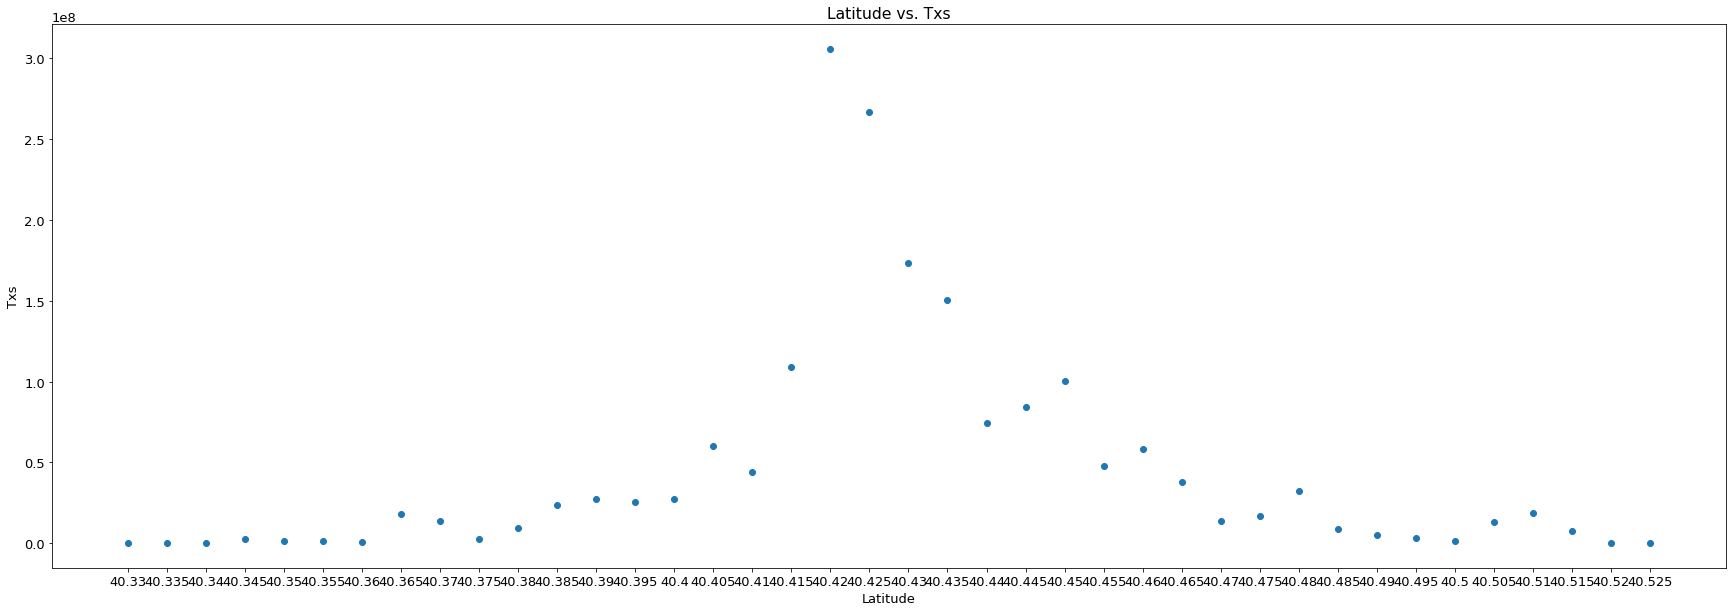

In [21]:
# Build a scatter plot for each data type
plt.rcParams.update({'font.size': 13})
plt.figure(figsize=(30,10))
plt.scatter(cp_df["Latitude"], cp_df["Txs"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Txs")
plt.ylabel("Txs")
plt.xlabel("Latitude")
plt.grid(False)

# Save the figure
#plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

#### Category vs. Cards Plot

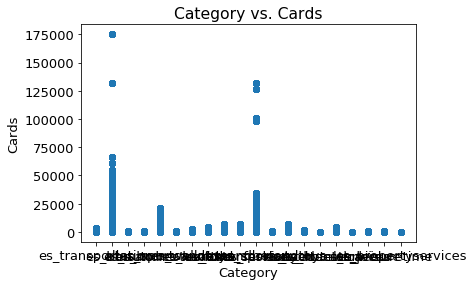

In [22]:
# Build a scatter plot for each data type
plt.scatter(consumption_pattern_201510_pd2["Category"], consumption_pattern_201510_pd2["Cards"], marker="o")

# Incorporate the other graph properties
plt.title("Category vs. Cards")
plt.ylabel("Cards")
plt.xlabel("Category")
plt.grid(False)

# Save the figure
#plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

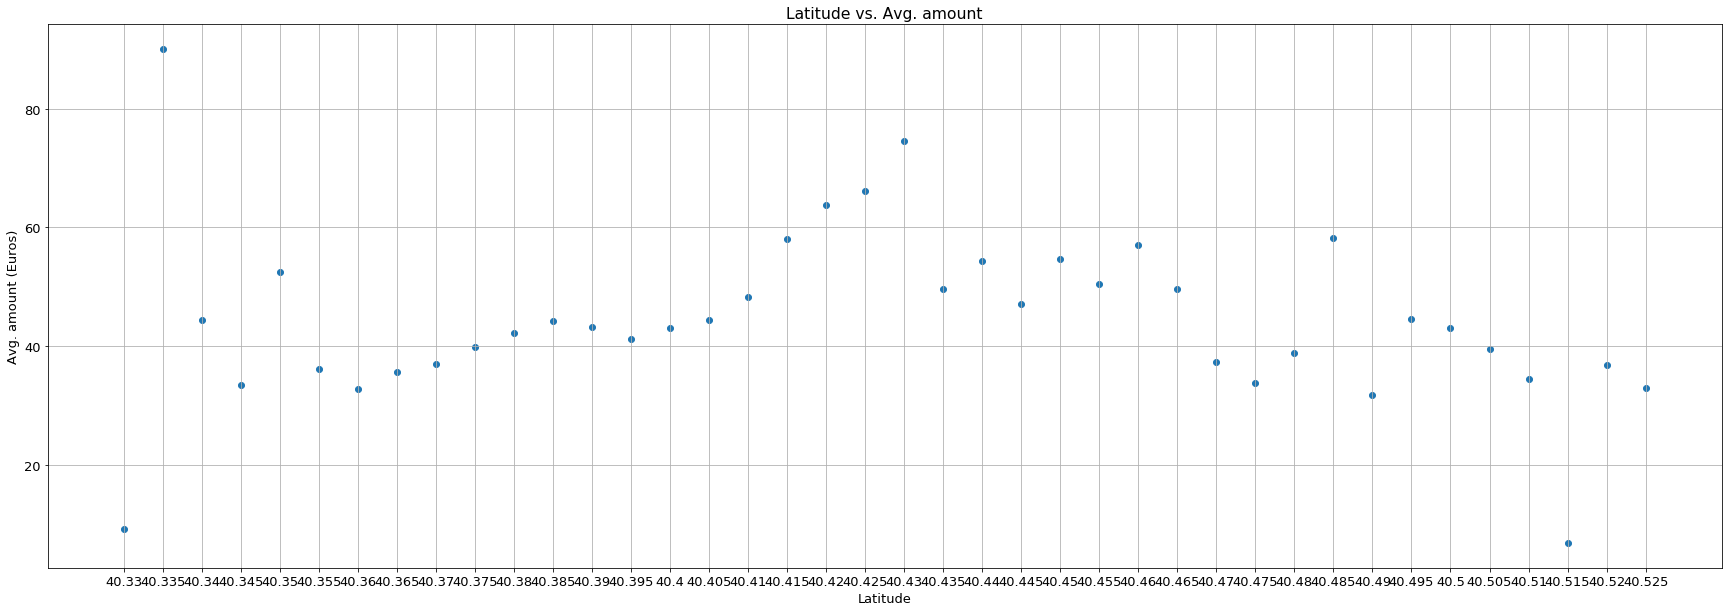

In [23]:
# Build a scatter plot for each data type
consumption_pattern_201510_pd.dropna(axis=0, how='any', inplace=True)
consumption_pattern_201510_pd['Latitude'] = [x.replace(',','.') for x in consumption_pattern_201510_pd["Latitude"]]
consumption_pattern_201510_pd['Avg. amount'] = [ str(x) for x in consumption_pattern_201510_pd["Avg. amount"]]
consumption_pattern_201510_pd['Avg. amount'] = [x.replace(',','.') for x in consumption_pattern_201510_pd["Avg. amount"]]
consumption_pattern_201510_pd['Avg. amount'] = [ float(x) for x in consumption_pattern_201510_pd["Avg. amount"]]


cp_df = consumption_pattern_201510_pd[["Latitude", 'Avg. amount']]
cp_df = cp_df.groupby(['Latitude'], as_index=False)[['Avg. amount']].mean()

plt.figure(figsize=(30,10))

plt.scatter(cp_df["Latitude"], cp_df["Avg. amount"], marker="o")


#plt.scatter(consumption_pattern_201510_pd["Latitude"], consumption_pattern_201510_pd["Avg. amount"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Avg. amount")
plt.ylabel("Avg. amount (Euros)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
#plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

### Category Distribution
----
#### Description
* This file provides category distributions statistics for a particular dimension.
* The file returns the average transaction amount and the number of transactions for each period and category or subcategory group as the output.

* The following combination between cards and channel params are available for this service:

| Cards         | Channel    
| ------------- |:-------------:
| All           | POS 
| BBVA          | POS    
| Foreign       | BBVA_POS     
| National      | BBVA_POS

#### Output Layout
1. Zone: territorial unit id (in the territorial unit tile will be composed of two fields: latitude and longitude).
2. Date: the date the data refers to (YYYY-MM format for month and YYYY-MM-DD for day).
3. Card: Card type.
4. Channel: Channel type.
5. Merchants: number of merchants with registered activity.
6. Cards: number of different cards.
7. Txs: number of physical purchase transactions.
8. Avg. amount: average transaction amount.
9. Category level: commercial category level type. Values: [categories, subcategories].
10. Category: commercial category label.
11. Merchants by category: number of merchants with registered activity of category or subcategory.
12. Cards by category: number of different cards of category or subcategory.
13. Txs by category: number of physical purchase transactions of category or subcategory.
14. Avg. amount by category: average transaction amount of category or subcategory.

In [24]:
# Load in file
category_distribution_201510 = "Monthly_data/2015_10/tiles/category_distribution.csv"

#### DataFrame
----

In [25]:
# Read and display the CSV with Pandas
category_distribution_201510_pd = pd.read_csv(category_distribution_201510, sep=';')
category_distribution_201510_pd.head(20)

,Latitude,Longitude,Date,Source,Channel,Merchants,Cards,Txs,Avg. amount,Category level,Category,Merchants by category,Cards by category,Txs by category,Avg. amount by category
0,"40,475","-3,835",2015-10,all,pos,9.0,150.0,171.0,"87,20398",subcategories,filtered,NaN,NaN,171.0,"87,20398"
1,"40,475","-3,835",2015-10,national,bbva_pos,NaN,NaN,NaN,NaN,subcategories,NaN,NaN,NaN,NaN,NaN
2,"40,475","-3,835",2015-10,bbva,pos,8.0,102.0,120.0,"100,40633",subcategories,filtered,NaN,NaN,120.0,"100,40634"
3,"40,475","-3,835",2015-10,foreign,bbva_pos,NaN,NaN,NaN,NaN,subcategories,NaN,NaN,NaN,NaN,NaN
4,"40,39","-3,83",2015-10,all,pos,NaN,NaN,NaN,NaN,subcategories,filtered,NaN,NaN,16.0,"182,88563"
5,"40,39","-3,83",2015-10,national,bbva_pos,NaN,NaN,NaN,NaN,subcategories,NaN,NaN,NaN,NaN,NaN
6,"40,39","-3,83",2015-10,bbva,pos,NaN,NaN,NaN,NaN,subcategories,NaN,NaN,NaN,NaN,NaN
7,"40,47","-3,83",2015-10,all,pos,NaN,NaN,NaN,NaN,subcategories,NaN,NaN,NaN,NaN,NaN
8,"40,47","-3,83",2015-10,bbva,pos,NaN,NaN,NaN,NaN,subcategories,NaN,NaN,NaN,NaN,NaN
9,"40,47","-3,825",2015-10,all,pos,NaN,NaN,NaN,NaN,subcategories,filtered,NaN,NaN,130.0,"35,60677"


In [26]:
# Verify the different columns. The amount, cards, ... should be numeric.
category_distribution_201510_pd.dtypes

Latitude                    object
Longitude                   object
Date                        object
Source                      object
Channel                     object
Merchants                  float64
Cards                      float64
Txs                        float64
Avg. amount                 object
Category level              object
Category                    object
Merchants by category      float64
Cards by category          float64
Txs by category            float64
Avg. amount by category     object
dtype: object

In [27]:
# Verify all rows with missing information
category_distribution_201510_pd.head(100)

,Latitude,Longitude,Date,Source,Channel,Merchants,Cards,Txs,Avg. amount,Category level,Category,Merchants by category,Cards by category,Txs by category,Avg. amount by category
0,"40,475","-3,835",2015-10,all,pos,9.0,150.0,171.0,"87,20398",subcategories,filtered,NaN,NaN,171.0,"87,20398"
1,"40,475","-3,835",2015-10,national,bbva_pos,NaN,NaN,NaN,NaN,subcategories,NaN,NaN,NaN,NaN,NaN
2,"40,475","-3,835",2015-10,bbva,pos,8.0,102.0,120.0,"100,40633",subcategories,filtered,NaN,NaN,120.0,"100,40634"
3,"40,475","-3,835",2015-10,foreign,bbva_pos,NaN,NaN,NaN,NaN,subcategories,NaN,NaN,NaN,NaN,NaN
4,"40,39","-3,83",2015-10,all,pos,NaN,NaN,NaN,NaN,subcategories,filtered,NaN,NaN,16.0,"182,88563"
5,"40,39","-3,83",2015-10,national,bbva_pos,NaN,NaN,NaN,NaN,subcategories,NaN,NaN,NaN,NaN,NaN
6,"40,39","-3,83",2015-10,bbva,pos,NaN,NaN,NaN,NaN,subcategories,NaN,NaN,NaN,NaN,NaN
7,"40,47","-3,83",2015-10,all,pos,NaN,NaN,NaN,NaN,subcategories,NaN,NaN,NaN,NaN,NaN
8,"40,47","-3,83",2015-10,bbva,pos,NaN,NaN,NaN,NaN,subcategories,NaN,NaN,NaN,NaN,NaN
9,"40,47","-3,825",2015-10,all,pos,NaN,NaN,NaN,NaN,subcategories,filtered,NaN,NaN,130.0,"35,60677"


In [28]:
# Count all rows
category_distribution_201510_pd.count()

Latitude                   13851
Longitude                  13851
Date                       13851
Source                     13851
Channel                    13851
Merchants                  10212
Cards                      10212
Txs                        10212
Avg. amount                10212
Category level             13851
Category                   12283
Merchants by category       7348
Cards by category           7348
Txs by category            12283
Avg. amount by category    12283
dtype: int64

In [29]:
category_distribution_201510_pd.Category.unique()

array(['filtered', nan, 'es_restaurant', 'es_fashionbig', 'es_foodsme',
       'es_fashionsme', 'es_pharmacy', 'es_beauty', 'es_cafe',
       'es_sportandtoys', 'es_drugstoresme', 'es_homesme', 'es_hospital',
       'es_shoe', 'es_books', 'es_goods', 'es_car', 'es_veterinarian',
       'es_telephony', 'es_tobacconists', 'es_techsme', 'es_jewelry',
       'es_gas', 'es_diysme', 'es_fastfood', 'es_pub', 'es_others',
       'es_hotel', 'es_photo', 'es_travelagency', 'es_education',
       'es_supermarket', 'es_leather', 'es_floristssme',
       'es_musicalinstrument', 'es_leisuretime', 'es_sport',
       'es_opticians', 'es_bet', 'es_realestate', 'es_parking',
       'es_drycleaner', 'es_barsandrestaurants', 'es_fashion',
       'es_health', 'es_wellnessandbeauty', 'es_food', 'es_otherservices',
       'es_home', 'es_sportsandtoys', 'es_tech', 'es_contents', 'es_auto',
       'es_transportation', 'es_hotelservices', 'es_travel', 'es_leisure',
       'es_propertyservices'], dtype=object)

In [30]:
nbr = category_distribution_201510_pd.Category.unique()
len(nbr)

58

In [31]:
# Get rid of all de NaN / filtered values values
category_distribution_201510_pd2 = category_distribution_201510_pd.dropna(how='any')
# Verify dropped rows
category_distribution_201510_pd2.count().head()

Latitude     7019
Longitude    7019
Date         7019
Source       7019
Channel      7019
dtype: int64

In [32]:
category_distribution_201510_pd2.Category.unique()

array(['es_restaurant', 'es_fashionbig', 'es_foodsme', 'es_fashionsme',
       'es_pharmacy', 'es_beauty', 'es_cafe', 'es_sportandtoys',
       'es_drugstoresme', 'es_homesme', 'es_hospital', 'es_shoe',
       'es_books', 'es_goods', 'es_car', 'es_veterinarian',
       'es_telephony', 'es_tobacconists', 'es_techsme', 'es_jewelry',
       'es_gas', 'es_diysme', 'es_fastfood', 'es_pub', 'es_others',
       'es_hotel', 'es_photo', 'es_travelagency', 'es_education',
       'es_supermarket', 'es_leather', 'es_floristssme',
       'es_musicalinstrument', 'es_leisuretime', 'es_sport',
       'es_opticians', 'es_bet', 'es_realestate', 'es_parking',
       'es_drycleaner', 'es_barsandrestaurants', 'es_fashion',
       'es_health', 'es_wellnessandbeauty', 'es_food', 'es_otherservices',
       'es_home', 'es_sportsandtoys', 'es_tech', 'es_contents', 'es_auto',
       'es_transportation', 'es_hotelservices', 'es_travel', 'es_leisure',
       'es_propertyservices'], dtype=object)

In [33]:
nbr = category_distribution_201510_pd.Category.unique()
len(nbr)

58

In [34]:
category_distribution_201510_pd2['Category'] = category_distribution_201510_pd2['Category'].replace(['es_health', 'es_pharmacy', 'es_hospital', 'es_opticians'], 'Health')
category_distribution_201510_pd2['Category'] = category_distribution_201510_pd2['Category'].replace(['es_transportation', 'es_parking', 'es_gas'], 'Transportation')
category_distribution_201510_pd2['Category'] = category_distribution_201510_pd2['Category'].replace(['es_photo', 'es_musicalinstrument', 'es_techsme', 'es_telephony'], 'Tech')
category_distribution_201510_pd2['Category'] = category_distribution_201510_pd2['Category'].replace(['es_food', 'es_supermarket', 'es_foodsme'], 'Food')
category_distribution_201510_pd2['Category'] = category_distribution_201510_pd2['Category'].replace(['es_home', 'es_floristsbig', 'es_homesme', 'es_floristssme', 'es_diysme'], 'Home')
category_distribution_201510_pd2['Category'] = category_distribution_201510_pd2['Category'].replace(['es_sportsandtoys', 'es_sport'], 'SportsAndToys')
category_distribution_201510_pd2['Category'] = category_distribution_201510_pd2['Category'].replace(['es_leisure', 'es_bet'], 'Leisure')
category_distribution_201510_pd2['Category'] = category_distribution_201510_pd2['Category'].replace(['es_contents', 'es_books'], 'Contents')
category_distribution_201510_pd2['Category'] = category_distribution_201510_pd2['Category'].replace(['es_fashion', 'es_jewelry', 'es_fashionsme', 'es_leather', 'es_shoe', 'es_fashionbig'], 'Fashion')
category_distribution_201510_pd2['Category'] = category_distribution_201510_pd2['Category'].replace(['es_hotelservices', 'es_hotel'], 'HotelServices')
category_distribution_201510_pd2['Category'] = category_distribution_201510_pd2['Category'].replace(['es_travel', 'es_travelagency'], 'Travel')
category_distribution_201510_pd2['Category'] = category_distribution_201510_pd2['Category'].replace(['es_barsandrestaurants', 'es_fastfood', 'es_restaurant', 'es_pub', 'es_cafe'], 'BarsAndRestaurants')
category_distribution_201510_pd2['Category'] = category_distribution_201510_pd2['Category'].replace(['es_propertyservices', 'es_realestate'], 'PropertyServices')
category_distribution_201510_pd2['Category'] = category_distribution_201510_pd2['Category'].replace(['es_auto', 'es_car'], 'Auto')
category_distribution_201510_pd2['Category'] = category_distribution_201510_pd2['Category'].replace(['es_otherservices', 'es_veterinarian', 'es_others', 'es_tobacconists', 'es_goods', 'es_drycleaner'], 'OtherServices')
category_distribution_201510_pd2['Category'] = category_distribution_201510_pd2['Category'].replace(['es_wellnessandbeauty', 'es_beauty', 'es_drugstoresme'], 'WellnessAndBeauty')

C:\Users\MB07968\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\MB07968\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\MB07968\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [35]:
category_distribution_201510_pd2.Category.unique()

array(['BarsAndRestaurants', 'Fashion', 'Food', 'Health',
       'WellnessAndBeauty', 'es_sportandtoys', 'Home', 'Contents',
       'OtherServices', 'Auto', 'Tech', 'Transportation', 'HotelServices',
       'Travel', 'es_education', 'es_leisuretime', 'SportsAndToys',
       'Leisure', 'PropertyServices', 'es_tech'], dtype=object)

In [36]:
n = category_distribution_201510_pd2.Category.unique()
len(n)

20

In [37]:
category_distribution_201510_pd2.head()

,Latitude,Longitude,Date,Source,Channel,Merchants,Cards,Txs,Avg. amount,Category level,Category,Merchants by category,Cards by category,Txs by category,Avg. amount by category
50,"40,465","-3,795",2015-10,all,pos,18.0,1527.0,2467.0,"32,422",subcategories,BarsAndRestaurants,5.0,340.0,417.0,"39,17149"
65,"40,465","-3,79",2015-10,all,pos,3.0,136.0,161.0,"114,21037",subcategories,BarsAndRestaurants,3.0,136.0,161.0,"114,21037"
66,"40,465","-3,79",2015-10,bbva,pos,3.0,136.0,161.0,"114,21037",subcategories,BarsAndRestaurants,3.0,136.0,161.0,"114,21037"
71,"40,445","-3,785",2015-10,all,pos,81.0,19984.0,27988.0,"47,17758",subcategories,Fashion,4.0,9206.0,11215.0,"47,81527"
72,"40,445","-3,785",2015-10,all,pos,81.0,19984.0,27988.0,"47,17758",subcategories,Food,10.0,1515.0,2226.0,"34,60181"


In [38]:
df_cat_cards = category_distribution_201510_pd2[['Category', 'Cards']]
df_tmp = df_cat_cards.groupby(['Category'], as_index=False).sum()
df_tmp.head()

,Category,Cards
0,Auto,870614.0
1,BarsAndRestaurants,11142167.0
2,Contents,1451544.0
3,Fashion,9716062.0
4,Food,3507794.0


In [39]:
# Export this file to a spread to be able to use it for the Analysis exercise (without the index)
category_distribution_201510_pd2.to_csv("output/category_distribution_analysis.csv", index=False)

#### Plotting the Data
----

#### Txs vs. Source Plot

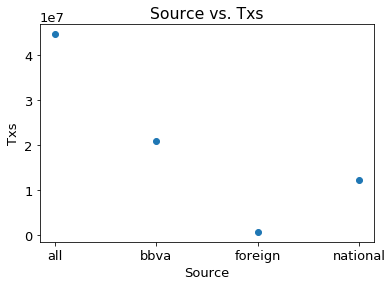

In [40]:
# Build a scatter plot for each data type
cp_df = category_distribution_201510_pd2[["Source", 'Txs']]
cp_df = cp_df.groupby(['Source'], as_index=False)[['Txs']].sum()

plt.scatter(cp_df["Source"], cp_df["Txs"], marker="o")

# Incorporate the other graph properties
plt.title("Source vs. Txs")
plt.ylabel("Txs")
plt.xlabel("Source")
plt.grid(False)

# Save the figure
#plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

#### Category vs. Cards by Category Plot

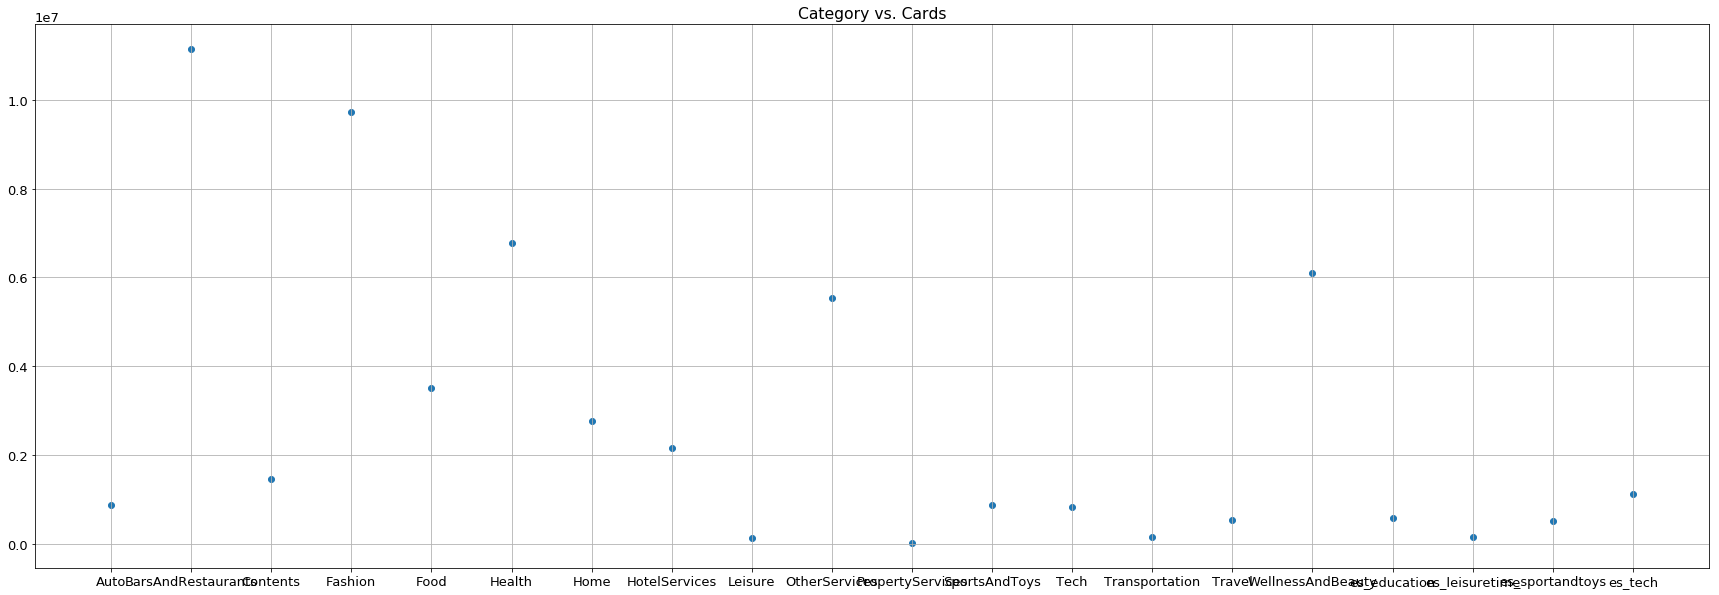

In [41]:
plt.figure(figsize=(30,10))

plt.scatter(df_tmp["Category"], df_tmp["Cards"], marker="o")


#plt.scatter(consumption_pattern_201510_pd["Latitude"], consumption_pattern_201510_pd["Avg. amount"], marker="o")

# Incorporate the other graph properties
plt.title("Category vs. Cards")
#plt.ylabel("Avg. amount (Euros)")
#plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("categ_vs_cards.jpg")
plt.show()

#### Category vs. Txs by Category Plot

In [61]:
plt.figure(figsize=(30,10))

plt.scatter(df_tmp["Category"], df_tmp["Txs"], marker="o")


#plt.scatter(consumption_pattern_201510_pd["Latitude"], consumption_pattern_201510_pd["Avg. amount"], marker="o")

# Incorporate the other graph properties
plt.title("Category vs. Txs")
#plt.ylabel("Avg. amount (Euros)")
#plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("categ_vs_txs.jpg")
plt.show()

KeyError: 'Txs'

<Figure size 2160x720 with 0 Axes>

### Origin Distribution by Categories
----
#### Description
* This file provides origin distribution statistics by categories for a particular area.
* The file returns the average transaction amount, the number of transactions, number of merchants and the number of cards for each period and origin as the output.

* The following combinations that are available for this service:

| Cards         | Channel        | Origin_Type
| ------------- |:-------------: |:-------------:
| All           | POS            | countries
| BBVA          | POS            | localities
| Foreign       | BBVA_POS       | subregions
| National      | BBVA_POS       | zipcodes

#### Output Layout
1. Zone: territorial unit id (in the territorial unit tile will be composed of two fields: latitude and longitude).
2. Date: the date the data refers to (YYYY-MM format for month and YYYY-MM-DD for day).
3. Card: Card type.
4. Channel: Channel type.
5. Merchants: number of merchants with registered activity.
6. Cards: number of different cards.
7. Txs: number of physical purchase transactions.
8. Avg. amount: average transaction amount.
9. Origin type: type of origin. Values: [subregions, localities, zipcodes, countries].
10. Origin: ID of the origin.
11. Merchants by origin: number of merchants with registered activity in this origin.
12. Cards by origin: number of different cards in this origin.
13. Txs by origin: number of physical purchase transactions in this origin.
14. Avg. amount by origin: average amount in this origin.
15. Category: id for the category.
16. Merchants by category: number of merchants with registered activity of the category in this origin.
17. Cards by category: number of different cards of the category in this origin.
18. Txs by category: number of physical purchase transactions of the category in this origin.
19. Avg. amount by category: average amount of the category in this origin.

In [43]:
# Load in file
origin_distribution_categories_201510 = "Monthly_data/2015_10/tiles/origin_distribution_categories.csv"

#### DataFrame
----

In [44]:
# Read and display the CSV with Pandas
origin_distribution_categories_201510_pd = pd.read_csv(origin_distribution_categories_201510, sep=';')
origin_distribution_categories_201510_pd.head(20)

,Latitude,Longitude,Date,Source,Channel,Merchants,Cards,Txs,Avg. amount,Origin type,Origin,Merchants by origin,Cards by origin,Txs by origin,Avg. amount by origin,Category,Merchants by category,Cards by category,Txs by category,Avg. amount by category
0,"40,475","-3,835",2015-10,foreign,bbva_pos,NaN,NaN,NaN,NaN,countries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"40,465","-3,81",2015-10,foreign,bbva_pos,NaN,NaN,NaN,NaN,countries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"40,465","-3,805",2015-10,foreign,bbva_pos,NaN,NaN,NaN,NaN,countries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"40,465","-3,8",2015-10,foreign,bbva_pos,NaN,NaN,NaN,NaN,countries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"40,47","-3,8",2015-10,foreign,bbva_pos,NaN,NaN,NaN,NaN,countries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"40,38","-3,795",2015-10,foreign,bbva_pos,NaN,NaN,NaN,NaN,countries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"40,465","-3,795",2015-10,foreign,bbva_pos,NaN,NaN,NaN,NaN,countries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"40,46","-3,79",2015-10,foreign,bbva_pos,NaN,NaN,NaN,NaN,countries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"40,445","-3,785",2015-10,foreign,bbva_pos,21.0,250.0,304.0,"53,07266",countries,filtered,NaN,NaN,65.0,"49,992",NaN,NaN,NaN,NaN,NaN
9,"40,445","-3,785",2015-10,foreign,bbva_pos,21.0,250.0,304.0,"53,07266",countries,us,10.0,49.0,60.0,"39,98917",es_barsandrestaurants,4.0,4.0,4.0,"17,3425"


In [45]:
# Verify the different columns. The amount, cards, ... should be numeric.
origin_distribution_categories_201510_pd.dtypes

Latitude                    object
Longitude                   object
Date                        object
Source                      object
Channel                     object
Merchants                  float64
Cards                      float64
Txs                        float64
Avg. amount                 object
Origin type                 object
Origin                      object
Merchants by origin        float64
Cards by origin            float64
Txs by origin              float64
Avg. amount by origin       object
Category                    object
Merchants by category      float64
Cards by category          float64
Txs by category            float64
Avg. amount by category     object
dtype: object

In [46]:
# Verify all rows with missing information
origin_distribution_categories_201510_pd.head(50)

,Latitude,Longitude,Date,Source,Channel,Merchants,Cards,Txs,Avg. amount,Origin type,Origin,Merchants by origin,Cards by origin,Txs by origin,Avg. amount by origin,Category,Merchants by category,Cards by category,Txs by category,Avg. amount by category
0,"40,475","-3,835",2015-10,foreign,bbva_pos,NaN,NaN,NaN,NaN,countries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"40,465","-3,81",2015-10,foreign,bbva_pos,NaN,NaN,NaN,NaN,countries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"40,465","-3,805",2015-10,foreign,bbva_pos,NaN,NaN,NaN,NaN,countries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"40,465","-3,8",2015-10,foreign,bbva_pos,NaN,NaN,NaN,NaN,countries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"40,47","-3,8",2015-10,foreign,bbva_pos,NaN,NaN,NaN,NaN,countries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"40,38","-3,795",2015-10,foreign,bbva_pos,NaN,NaN,NaN,NaN,countries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"40,465","-3,795",2015-10,foreign,bbva_pos,NaN,NaN,NaN,NaN,countries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"40,46","-3,79",2015-10,foreign,bbva_pos,NaN,NaN,NaN,NaN,countries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"40,445","-3,785",2015-10,foreign,bbva_pos,21.0,250.0,304.0,"53,07266",countries,filtered,NaN,NaN,65.0,"49,992",NaN,NaN,NaN,NaN,NaN
9,"40,445","-3,785",2015-10,foreign,bbva_pos,21.0,250.0,304.0,"53,07266",countries,us,10.0,49.0,60.0,"39,98917",es_barsandrestaurants,4.0,4.0,4.0,"17,3425"


In [47]:
# Count all rows
origin_distribution_categories_201510_pd.count()

Latitude                   91452
Longitude                  91452
Date                       91452
Source                     91452
Channel                    91452
Merchants                  89860
Cards                      89860
Txs                        89860
Avg. amount                89860
Origin type                91452
Origin                     89860
Merchants by origin        88078
Cards by origin            88078
Txs by origin              89860
Avg. amount by origin      89860
Category                   88078
Merchants by category      55351
Cards by category          55351
Txs by category            88078
Avg. amount by category    88078
dtype: int64

In [48]:
# Get rid of all de NaN / filtered values values
origin_distribution_categories_201510_pd2 = origin_distribution_categories_201510_pd.dropna(how='any')
# Verify dropped rows
origin_distribution_categories_201510_pd2.count().head()

Latitude     55351
Longitude    55351
Date         55351
Source       55351
Channel      55351
dtype: int64

In [49]:
# Export this file to a spread to be able to use it for the Analysis exercise (without the index)
origin_distribution_categories_201510_pd2.to_csv("output/origin_distribution_categories_analysis.csv", index=False)

In [71]:
origin_distribution_categories_201510_pd2.Origin.unique()

array(['us', 'gb', 'fr', 've', 'it', 'mx', 'de', 'pt', 'ru', 'cn', 'ar',
       'ch', 'co', 'be', 'ae', 'nl', 'il', 'se', 'br', 'kr', 'cl', 'lu',
       'gt', 'ie', 'pa', 'no', 'fi', 'dk', 'pl', 'at', 'others', 'do',
       'jp', 'ro', 'ca', 'pe', 'hk', 'pr', 'cr', 'ec', 'lb', 'ad', 'au',
       'in', 'uy', 'gr', 'tr', 'tw', 'cz', 'sa', 'cy', 'hu', 'hn', 'kw',
       'th', 'lv', 'ph', 'eg', 'mt', 'is', 'za', 'ua', 'sg', 'lt', 'ge',
       'qa', 'id', 'my', 'ao', 'nz', 'sv', '28079', '28115', '28127',
       '28080', '28152', 'U', '28022', '28176', '35016', '37107', '48044',
       '28007', '28092', '28074', '28006', '28177', '28047', '28119',
       '28903', '28131', '37274', '28005', '29067', '28134', '28065',
       '28058', '28123', '38038', '45165', '28049', '28106', '28161',
       '45081', '28113', '28013', '28181', '45161', '28149', '52001',
       '50297', '45168', '32054', '28014', '40194', '12040', '28132',
       '24089', '28040', '28073', '13087', '41091', '45064', '46250',

#### Plotting the Data
----

#### Origin vs. Cards by Origin Plot

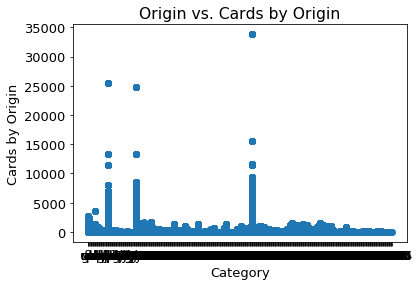

In [72]:
# Build a scatter plot for each data type
plt.scatter(origin_distribution_categories_201510_pd2["Origin"], origin_distribution_categories_201510_pd2["Cards by origin"], marker="o")

# Incorporate the other graph properties
plt.title("Origin vs. Cards by Origin")
plt.ylabel("Cards by Origin")
plt.xlabel("Category")
plt.grid(False)

# Save the figure
#plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

#### Origin vs. Txs by Category Plot

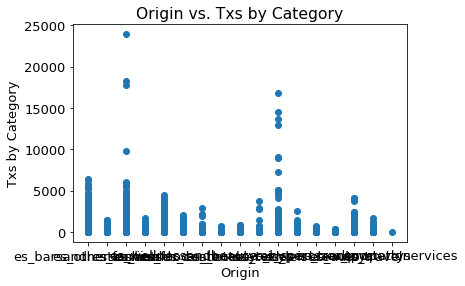

In [51]:
# Build a scatter plot for each data type
plt.scatter(origin_distribution_categories_201510_pd2["Category"], origin_distribution_categories_201510_pd2["Txs by category"], marker="o")

# Incorporate the other graph properties
plt.title("Origin vs. Txs by Category")
plt.ylabel("Txs by Category")
plt.xlabel("Origin")
plt.grid(False)

# Save the figure
#plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

### Origin Distribution by ages & Genders
----
#### Description
* This file provides category distributions statistics for a particular dimension.
* The file returns the average transaction amount and the number of transactions for each period and category or subcategory group as the output.

* The following combination between cards and channel params are available for this service:

| Cards         | Channel    
| ------------- |:-------------:
| All           | POS 
| BBVA          | POS    
| Foreign       | BBVA_POS     
| National      | BBVA_POS

#### Output Layout
1. Zone: territorial unit id (in the territorial unit tile will be composed of two fields: latitude and longitude).
2. Date: the date the data refers to (YYYY-MM format for month and YYYY-MM-DD for day).
3. Card: Card type.
4. Channel: Channel type.
5. Merchants: number of merchants with registered activity.
6. Cards: number of different cards.
7. Txs: number of physical purchase transactions.
8. Avg. amount: average transaction amount.
9. Category level: commercial category level type. Values: [categories, subcategories].
10. Category: commercial category label.
11. Merchants by category: number of merchants with registered activity of category or subcategory.
12. Cards by category: number of different cards of category or subcategory.
13. Txs by category: number of physical purchase transactions of category or subcategory.
14. Avg. amount by category: average transaction amount of category or subcategory.

In [52]:
# Load in file
origin_distribution_ages_genders_201510 = "Monthly_data/2015_10/tiles/origin_distribution_ages_genders.csv"

#### DataFrame
----

In [53]:
# Read and display the CSV with Pandas
origin_distribution_ages_genders_201510_pd = pd.read_csv(origin_distribution_ages_genders_201510, sep=';')
origin_distribution_ages_genders_201510_pd.head()

,Latitude,Longitude,Date,Source,Channel,Merchants,Cards,Txs,Avg. amount,Origin type,...,Age,Merchants by age,Cards by age,Txs by age,Avg. amount by age,Gender,Merchants by gender,Cards by gender,Txs by gender,Avg. amount by gender
0,"40,325","-3,71",2015-10,bbva,pos,NaN,NaN,NaN,NaN,subregions,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"40,33","-3,66",2015-10,bbva,pos,NaN,NaN,NaN,NaN,subregions,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"40,33","-3,69",2015-10,bbva,pos,8.0,620.0,760.0,"9,45928",subregions,...,1,3.0,3.0,3.0,"9,19333",filtered,NaN,NaN,3.0,"9,19333"
3,"40,33","-3,69",2015-10,bbva,pos,8.0,620.0,760.0,"9,45928",subregions,...,2,3.0,7.0,7.0,"7,47429",filtered,NaN,NaN,1.0,"10,29"
4,"40,33","-3,69",2015-10,bbva,pos,8.0,620.0,760.0,"9,45928",subregions,...,3,3.0,3.0,4.0,"7,7975",filtered,NaN,NaN,4.0,"7,7975"


In [54]:
# Verify the different columns. The amount, cards, ... should be numeric.
origin_distribution_ages_genders_201510_pd.dtypes

Latitude                  object
Longitude                 object
Date                      object
Source                    object
Channel                   object
Merchants                float64
Cards                    float64
Txs                      float64
Avg. amount               object
Origin type               object
Origin                    object
Merchants by origin      float64
Cards by origin          float64
Txs by origin            float64
Avg. amount by origin     object
Age                       object
Merchants by age         float64
Cards by age             float64
Txs by age               float64
Avg. amount by age        object
Gender                    object
Merchants by gender      float64
Cards by gender          float64
Txs by gender            float64
Avg. amount by gender     object
dtype: object

In [55]:
# Verify all rows with missing information
origin_distribution_ages_genders_201510_pd.head()

,Latitude,Longitude,Date,Source,Channel,Merchants,Cards,Txs,Avg. amount,Origin type,...,Age,Merchants by age,Cards by age,Txs by age,Avg. amount by age,Gender,Merchants by gender,Cards by gender,Txs by gender,Avg. amount by gender
0,"40,325","-3,71",2015-10,bbva,pos,NaN,NaN,NaN,NaN,subregions,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"40,33","-3,66",2015-10,bbva,pos,NaN,NaN,NaN,NaN,subregions,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"40,33","-3,69",2015-10,bbva,pos,8.0,620.0,760.0,"9,45928",subregions,...,1,3.0,3.0,3.0,"9,19333",filtered,NaN,NaN,3.0,"9,19333"
3,"40,33","-3,69",2015-10,bbva,pos,8.0,620.0,760.0,"9,45928",subregions,...,2,3.0,7.0,7.0,"7,47429",filtered,NaN,NaN,1.0,"10,29"
4,"40,33","-3,69",2015-10,bbva,pos,8.0,620.0,760.0,"9,45928",subregions,...,3,3.0,3.0,4.0,"7,7975",filtered,NaN,NaN,4.0,"7,7975"


In [56]:
# Count all rows
origin_distribution_ages_genders_201510_pd.count()

Latitude                 145672
Longitude                145672
Date                     145672
Source                   145672
Channel                  145672
Merchants                144525
Cards                    144525
Txs                      144525
Avg. amount              144525
Origin type              145672
Origin                   144525
Merchants by origin      142896
Cards by origin          142896
Txs by origin            144525
Avg. amount by origin    144525
Age                      142896
Merchants by age         116556
Cards by age             116556
Txs by age               142896
Avg. amount by age       142896
Gender                   116556
Merchants by gender       85931
Cards by gender           85931
Txs by gender            116556
Avg. amount by gender    116556
dtype: int64

In [57]:
# Get rid of all de NaN / filtered values values
origin_distribution_ages_genders_201510_pd2 = origin_distribution_ages_genders_201510_pd.dropna(how='any')
# Verify dropped rows
origin_distribution_ages_genders_201510_pd2.count().head()

Latitude     85931
Longitude    85931
Date         85931
Source       85931
Channel      85931
dtype: int64

In [58]:
# Export this file to a spread to be able to use it for the Analysis exercise (without the index)
origin_distribution_ages_genders_201510_pd2.to_csv("output/origin_distribution_ages_genders.csv", index=False)

In [62]:
df_age_cardsage = origin_distribution_ages_genders_201510_pd2[['Age', 'Cards by age']]
df_age_cardsage2 = df_age_cardsage.groupby(['Age'], as_index=False).sum()
df_age_cardsage2.head()

,Age,Cards by age
0,0,342311.0
1,1,1217831.0
2,2,1202561.0
3,3,846589.0
4,4,540853.0


In [68]:
df_gender_cardsgender = origin_distribution_ages_genders_201510_pd2[['Gender', 'Cards by gender']]
df_gender_cardsgender2 = df_gender_cardsgender.groupby(['Gender'], as_index=False).sum()
df_gender_cardsgender2.head()

,Gender,Cards by gender
0,E,4840.0
1,F,1285630.0
2,M,1016069.0
3,U,94452.0


#### Plotting the Data
----

#### Age vs. Cards by Age Plot

#### Age ranges
* AGE RANGES
* Some statistics make use of age ranges to return the information. The following list shows the different age ranges that can be returned by the API:

[0]<=24
1. 25-34
2. 35-44
3. 45-54
4. 55-64
5. *>=65
6. U: 6Unknown

### Group 1 represents about 1bn of the credit cards we are considering in the analysis. It will be important 

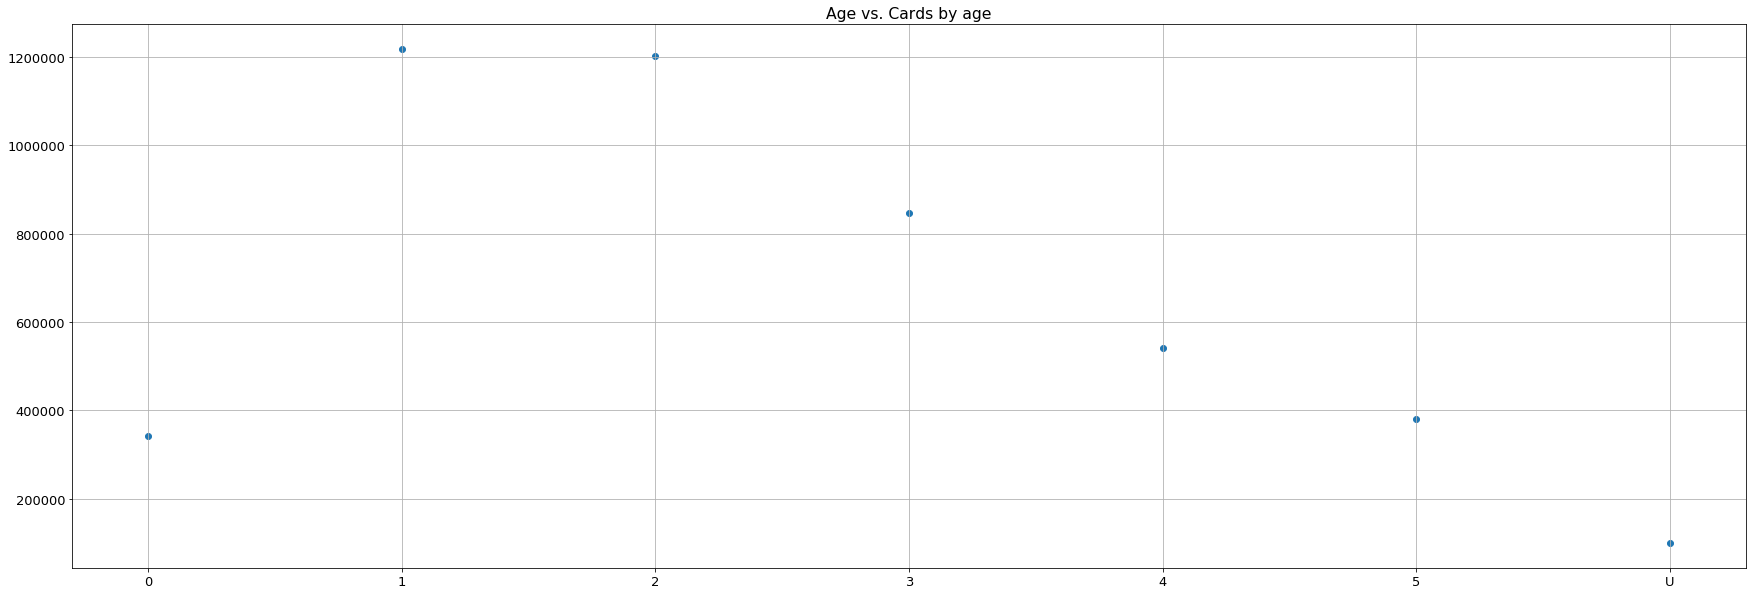

In [65]:
plt.figure(figsize=(30,10))

plt.scatter(df_age_cardsage2["Age"], df_age_cardsage2["Cards by age"], marker="o")


#plt.scatter(consumption_pattern_201510_pd["Latitude"], consumption_pattern_201510_pd["Avg. amount"], marker="o")

# Incorporate the other graph properties
plt.title("Age vs. Cards by age")
#plt.ylabel("Avg. amount (Euros)")
#plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("age_vs_cards.jpg")
plt.show()

 *Code	*Gender
* F	    Female
* M	    Male
* E	    Enterprise
* U	    Unknown

#### Gender vs. Cards by Gender Plot

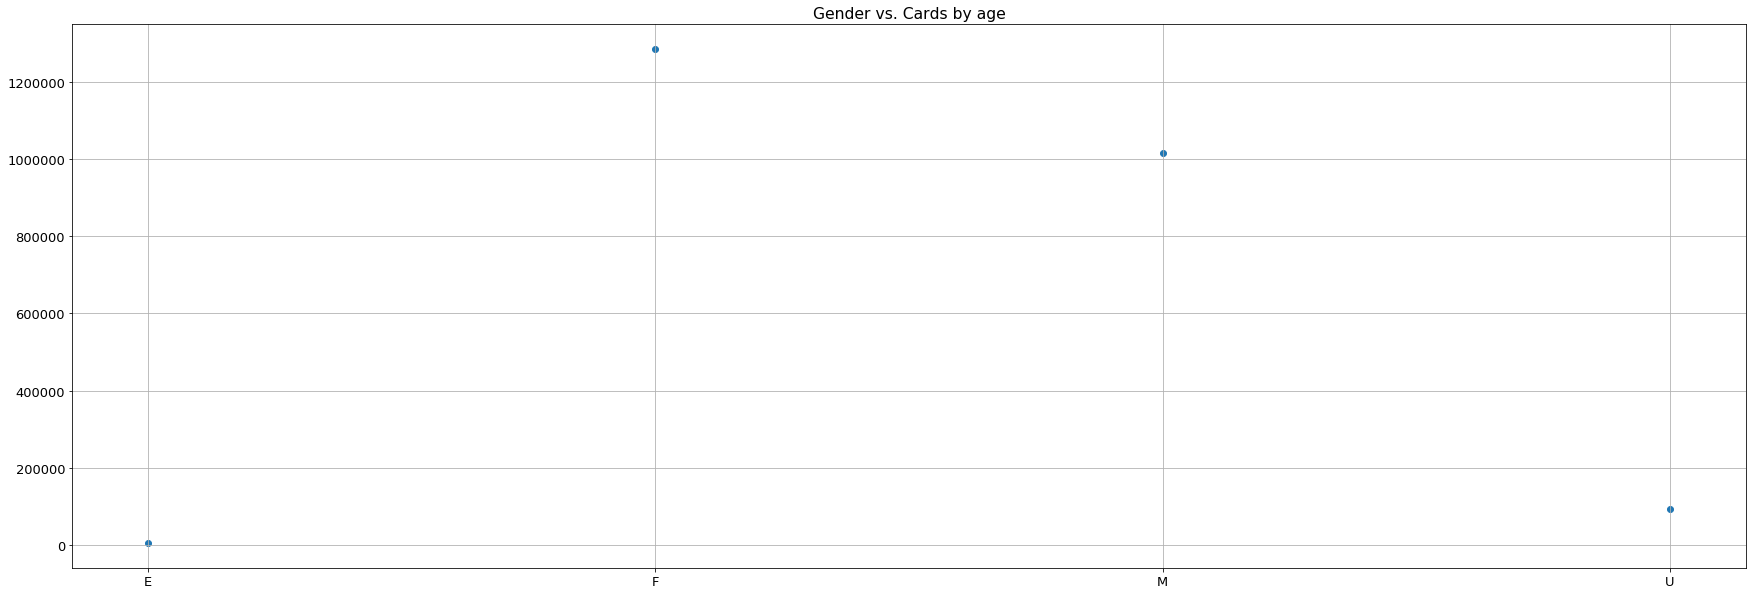

In [70]:
plt.figure(figsize=(30,10))

plt.scatter(df_gender_cardsgender2["Gender"], df_gender_cardsgender2["Cards by gender"], marker="o")


#plt.scatter(consumption_pattern_201510_pd["Latitude"], consumption_pattern_201510_pd["Avg. amount"], marker="o")

# Incorporate the other graph properties
plt.title("Gender vs. Cards by age")
#plt.ylabel("Avg. amount (Euros)")
#plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("gender_vs_cards.jpg")
plt.show()

### Regarding cards divided by gender, I found interesting the fact that females have 20% more credit cards than males in this sample. It will be interesting to look dor the avg transaction amount per gender and total, to look if the pattern changes.